### Week 13 Word Embeddings Tutorial
Tutorial for extracting word embeddings from words.<br>

### Word2Vec embeddings using the Gensim library.<br> 
    Word2Vec is a popular technique for learning word embeddings, which are dense vector representations of words that capture semantic relationships between words based on their context.<br>
    As discussed, Word2Vec have 2 types, Skipgrams and CBOW. Where SkipGrams are trained to predict context words given the target word, however CBOW is trained to predict target words given its context.


- Requirements: downloading punkt from nltk, and installing gensim library

In [ ]:
## The quick brown fox jumps over the lazy dog.
## Target Word: Jumps
## Context Words: Words in a context window size n --> n=2 [brown, fox, over, the]
## SkipGram: 
#   jumps (input) --> 4 outputs [brown, fox, over, the]
## CBOW: 
# [brown, fox, over, the] (inputs) --> 1 output (jumps)

In [ ]:
# importing needed libraries
import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

In [ ]:
# Sample Sentence
text = """
Natural language processing (NLP) is a subfield of artificial intelligence (AI) that focuses on the interaction between computers and humans through natural language. NLP techniques aim to enable computers to understand, interpret, and generate human language in a way that is both meaningful and contextually relevant.
"""
tokenized_words = word_tokenize(text.lower())
print(tokenized_words)

['natural', 'language', 'processing', '(', 'nlp', ')', 'is', 'a', 'subfield', 'of', 'artificial', 'intelligence', '(', 'ai', ')', 'that', 'focuses', 'on', 'the', 'interaction', 'between', 'computers', 'and', 'humans', 'through', 'natural', 'language', '.', 'nlp', 'techniques', 'aim', 'to', 'enable', 'computers', 'to', 'understand', ',', 'interpret', ',', 'and', 'generate', 'human', 'language', 'in', 'a', 'way', 'that', 'is', 'both', 'meaningful', 'and', 'contextually', 'relevant', '.']


In [ ]:
# Create a model
model_word2Vec = Word2Vec(sentences=[tokenized_words], vector_size=50, window=5,  min_count=1, workers=4)


In [ ]:
# Get word vector for a specific word
## Example: language
word = 'language'
wv_vector = model_word2Vec.wv[word]
print(f"Word Vector for {word} is {wv_vector}")

Word Vector for language is [-1.04924932e-03  4.22840036e-04  1.01921493e-02  1.80208944e-02
 -1.85975824e-02 -1.42208599e-02  1.29707102e-02  1.79747008e-02
 -1.00614503e-02 -7.51019455e-03  1.47279548e-02 -3.08123045e-03
 -9.06075630e-03  1.31399417e-02 -9.73974820e-03 -3.60585051e-03
  5.78764221e-03  2.02601845e-03 -1.65603217e-02 -1.89395323e-02
  1.46390153e-02  1.01228226e-02  1.35796499e-02  1.54736219e-03
  1.27078006e-02 -6.81248819e-03 -1.89916836e-03  1.15286848e-02
 -1.50743807e-02 -7.89453555e-03 -1.50234010e-02 -1.84506015e-03
  1.90822110e-02 -1.46591011e-02 -4.66508837e-03 -3.87337268e-03
  1.61433201e-02 -1.19048795e-02  7.79837355e-05 -9.55065712e-03
 -1.91739332e-02  9.98215098e-03 -1.75059494e-02 -8.77499487e-03
 -2.21634273e-05 -5.67505893e-04 -1.53313102e-02  1.92039497e-02
  9.98303201e-03  1.84752923e-02]


In [ ]:
# Find similar words
similar_words = model_word2Vec.wv.most_similar(word)
print(f'Most similar words are {similar_words}')

Most similar words are [('way', 0.27101483941078186), ('between', 0.2417445182800293), ('ai', 0.21129381656646729), ('of', 0.18660590052604675), ('natural', 0.1674286276102066), ('subfield', 0.16039668023586273), ('enable', 0.15051932632923126), ('on', 0.1452927589416504), ('is', 0.13285453617572784), ('computers', 0.12684977054595947)]


SKIPGRAM

In [ ]:
# Create a model
model_word2Vec_sg = Word2Vec(sentences=[tokenized_words], vector_size=50, window=5,  min_count=1, workers=4, sg=1)

# Get word vector for a specific word
wv_skipgram = model_word2Vec_sg.wv[word] 
print(f'Word Vector skipgram is {wv_skipgram}')
# Find similar words
similar_words_sg = model_word2Vec_sg.wv.most_similar(word)
print(f'Most similar words are {similar_words_sg}')

Word Vector skipgram is [-9.03553970e-04  6.09972230e-05  1.00390101e-02  1.80581324e-02
 -1.85802374e-02 -1.42736342e-02  1.31737618e-02  1.81576647e-02
 -1.02728289e-02 -7.52615416e-03  1.45699615e-02 -3.23969754e-03
 -8.90274160e-03  1.33267427e-02 -9.75288637e-03 -3.34877032e-03
  5.90627361e-03  2.19281320e-03 -1.65371932e-02 -1.91209484e-02
  1.47795556e-02  1.00894021e-02  1.37643609e-02  1.57578371e-03
  1.28754247e-02 -6.85847225e-03 -1.91866246e-03  1.16009628e-02
 -1.51612358e-02 -8.00818577e-03 -1.49769830e-02 -1.86830643e-03
  1.90617591e-02 -1.46751460e-02 -4.67565376e-03 -3.88333946e-03
  1.62615869e-02 -1.20394714e-02  4.63891411e-05 -9.83959157e-03
 -1.90989133e-02  9.84797068e-03 -1.74361710e-02 -8.68283305e-03
  1.56206806e-04 -4.42421937e-04 -1.53591009e-02  1.90436654e-02
  1.01097953e-02  1.86039284e-02]
Most similar words are [('way', 0.27579179406166077), ('between', 0.24940559267997742), ('ai', 0.21399669349193573), ('of', 0.18884523212909698), ('natural', 0.16

In [ ]:
# How to save/load skipgram and CBOW models?
model_word2Vec_sg.save('skipgram_word2vec.bin')
## Loading
loaded_sg = Word2Vec.load('skipgram_word2vec.bin')
loaded_sg.wv[word]

array([-9.03553970e-04,  6.09972230e-05,  1.00390101e-02,  1.80581324e-02,
       -1.85802374e-02, -1.42736342e-02,  1.31737618e-02,  1.81576647e-02,
       -1.02728289e-02, -7.52615416e-03,  1.45699615e-02, -3.23969754e-03,
       -8.90274160e-03,  1.33267427e-02, -9.75288637e-03, -3.34877032e-03,
        5.90627361e-03,  2.19281320e-03, -1.65371932e-02, -1.91209484e-02,
        1.47795556e-02,  1.00894021e-02,  1.37643609e-02,  1.57578371e-03,
        1.28754247e-02, -6.85847225e-03, -1.91866246e-03,  1.16009628e-02,
       -1.51612358e-02, -8.00818577e-03, -1.49769830e-02, -1.86830643e-03,
        1.90617591e-02, -1.46751460e-02, -4.67565376e-03, -3.88333946e-03,
        1.62615869e-02, -1.20394714e-02,  4.63891411e-05, -9.83959157e-03,
       -1.90989133e-02,  9.84797068e-03, -1.74361710e-02, -8.68283305e-03,
        1.56206806e-04, -4.42421937e-04, -1.53591009e-02,  1.90436654e-02,
        1.01097953e-02,  1.86039284e-02], dtype=float32)

How to use word2Vec for SkipGrams and CBOW? Explore whether they will give different results for similar words

### Clustering Words based on Cooccurence Pattern --> Brown Clustering

In [ ]:
from nltk.corpus import brown
import numpy as np
# download brown corpus if not downloaded before
# nltk.download('brown')

In [ ]:
# retrieve sentences from brown corpus
corpus = brown.sents()[:1]
# transform all sentences to lower case
corpus = [[word.lower() for word in sent] for sent in corpus]

# Create a set of unique words in the corpus --> Vocab
vocab = set(word for sent in corpus for word in sent)

In [ ]:
corpus

[['the',
  'fulton',
  'county',
  'grand',
  'jury',
  'said',
  'friday',
  'an',
  'investigation',
  'of',
  "atlanta's",
  'recent',
  'primary',
  'election',
  'produced',
  '``',
  'no',
  'evidence',
  "''",
  'that',
  'any',
  'irregularities',
  'took',
  'place',
  '.']]

In [ ]:
# to find co-occurence pattern, co-occurence matrix is needed to show the word count and which words does it co-occur with
window = 2
co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
vocab_list = list(vocab)
for sentence in corpus:
    for i,word in enumerate(sentence):
        word_i_index = vocab_list.index(word)
        for j in range(max(0, i-window), min(len(sentence),i+window+1)):
            if i!=j:
               word_j_index = vocab_list.index(sentence[j]) 
               co_occurrence_matrix[word_i_index, word_j_index]+=1
vocab, co_occurrence_matrix[10,24], co_occurrence_matrix[24,10]

({"''",
  '.',
  '``',
  'an',
  'any',
  "atlanta's",
  'county',
  'election',
  'evidence',
  'friday',
  'fulton',
  'grand',
  'investigation',
  'irregularities',
  'jury',
  'no',
  'of',
  'place',
  'primary',
  'produced',
  'recent',
  'said',
  'that',
  'the',
  'took'},
 1.0,
 1.0)

In [ ]:
# Performing brown clustering, you need to set the number of clusters
num_clusters = 3
# assign each word as cluster
cluster_assignment = np.arange(len(vocab))

# Perform Brown clustering by recursively merging clusters
for k in range(len(vocab)-num_clusters):
    # Find the pair of clusters with the highest co-occurrence count
    
    i,j =np.unravel_index(co_occurrence_matrix.argmax(),co_occurrence_matrix.shape)
    
    # Merge the clusters by assigning the same cluster ID to both clusters
    cluster_assignment[cluster_assignment==j]=i
    
    # Update the co-occurrence matrix by merging the counts of the two clusters

    ## Summing up the row of i and j together into j
    co_occurrence_matrix[i,:]+=co_occurrence_matrix[j,:]
    ## Summing up the columns of i and j together into i
    
    co_occurrence_matrix[:,i]+=co_occurrence_matrix[:,j]
    ## Set diagonal i,i =0
    co_occurrence_matrix[i,i]=0
    ## Set all elements in j=0
    co_occurrence_matrix[j,:]=0
    co_occurrence_matrix[:,j]=0

# Final cluster assignments
cluster_assignment

array([ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 16,
        0,  0,  0,  0,  0,  0,  0,  0])

**NOTE: DONT RUN FOR LARGE DATASET**<br>
Visualizing brown clusters: <br>
Install scipy if you didn't use it before. pip install scipy


C:\Users\Islam\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # Remove the CWD from sys.path while we load stuff.


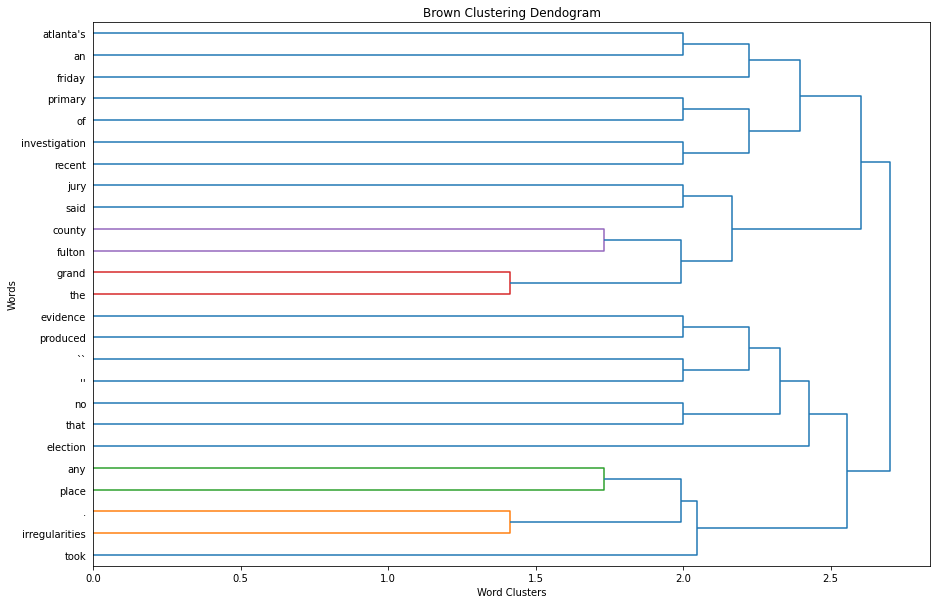

In [ ]:
# This code should be able to visualize brown clustering, however you need to experiment it with less words as it does many
# computations for the linkage matrix.
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
# Create a linkage matrix for hierarchical clustering
## Single: merge based on minimum distance between clusters
## Complete: merge based on maximum distance
## Average: Which averages the distance between elements in cluster i and j
## Ward: Optimized method using Error Sum of Squares 
linkage_matrix = linkage(co_occurrence_matrix, method='average')
# Plot the dendrogram
plt.figure(figsize=(15,10))
dendrogram(linkage_matrix, labels=list(vocab), orientation='right')
plt.xlabel('Word Clusters')
plt.ylabel('Words')
plt.title('Brown Clustering Dendogram')
plt.show()

### GloVe: 
Global Vectors for Word Representation is an unsupervised learning algorithm used to learn word embeddings from large amounts of text data. Word embeddings are dense vector representations of words that capture semantic relationships between words based on their co-occurrence statistics. 

- Steps: Preprocess the text data.<br>
Created the dictionary.<br>
Traverse the glove file of a specific dimension and compare each word with all words in the dictionary,
if a match occurs, copy the equivalent vector from the glove and paste into embedding_matrix at the corresponding index.<br>


In [ ]:
#Download Glove Pretrained Embeddings From: http://nlp.stanford.edu/data/glove.6B.zip  

def embedding_for_vocab(filepath, word_index,
                        embedding_dim):
    vocab_size = len(word_index) + 1
      
    # Adding again 1 because of reserved 0 index
    embedding_matrix_vocab = np.zeros((vocab_size,
                                       embedding_dim))
  
    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index.index(word)
                embedding_matrix_vocab[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
  
    return embedding_matrix_vocab
  
  
# matrix for vocab: tokenized_words
embedding_dim = 50
embedding_matrix_vocab = embedding_for_vocab(
    './glove.6B/glove.6B.50d.txt', tokenized_words,
  embedding_dim)
  
print("Dense vector for first word is => ",
      embedding_matrix_vocab[0])

Dense vector for first word is =>  [ 0.44264999  0.84764999 -0.4598      0.67992997  0.13841     0.39456001
 -0.17343    -0.64055002  0.86439002  0.81624001  0.75738001  0.41143
  1.09350002 -0.30068001 -0.08486     0.51784003  1.08700001  0.45061001
 -0.49595001 -0.60650003 -0.16749001 -0.28557    -0.043719   -0.86154002
  0.3396     -0.75239998 -0.33206001  0.24668001  1.00209999  0.71923
  3.30769992 -0.64754999  0.16509999 -0.91650999 -0.035363    0.21794
 -0.87897003  0.37801     0.66733003  0.42054    -0.21387     0.15917
  0.52244997  0.20587    -0.16714001  0.58058    -0.36827999  0.035571
  0.014099   -0.24817   ]


### Dimensionality Reduction --> SVD (LSA)
    Latent Semantic Analysis (LSA) is a technique used in natural language processing to uncover the latent structure in a corpus of text documents by applying Singular Value Decomposition (SVD) to a term-document matrix. It allows us to reduce the dimensionality of the document-term space, thereby capturing the underlying semantic relationships between words and documents.

Lets create a text corpus:

In [ ]:
corpus = [
    "The quick brown fox jumps over the lazy dog.",
    "The dog barked at the fox.",
    'Artificial intelligence is a domain trying to mimic human activity.',
    'NLP uses machine code to understand human language.',
    "The fox ran away quickly.",
    "The dog is lazy.",
    "NLP is a useful topic in Artificial Intelligence.",
    "The fox is cunning.",
    'Machines are now utilized with Machine Learning techniques.'
]


- Create Document-Term Matrix: We use the CountVectorizer from scikit-learn to convert the text documents into a document-term matrix. Each row in the matrix corresponds to a document, and each column represents a word's frequency in that document.

- Apply LSA (SVD): We use the TruncatedSVD class from scikit-learn to perform Latent Semantic Analysis. We specify the number of components (dimensions) we want to reduce the feature space to (in this case, we use n_components=2 for simplicity).

- Normalize Data: To ensure that each row in the transformed matrix has unit norm, we use the Normalizer from scikit-learn.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(X)

  (0, 30)	2
  (0, 26)	1
  (0, 6)	1
  (0, 11)	1
  (0, 16)	1
  (0, 25)	1
  (0, 18)	1
  (0, 9)	1
  (1, 30)	2
  (1, 11)	1
  (1, 9)	1
  (1, 5)	1
  (1, 3)	1
  (2, 2)	1
  (2, 14)	1
  (2, 15)	1
  (2, 10)	1
  (2, 33)	1
  (2, 31)	1
  (2, 22)	1
  (2, 12)	1
  (2, 0)	1
  (3, 31)	1
  (3, 12)	1
  (3, 23)	1
  :	:
  (4, 4)	1
  (4, 27)	1
  (5, 30)	1
  (5, 18)	1
  (5, 9)	1
  (5, 15)	1
  (6, 2)	1
  (6, 14)	1
  (6, 15)	1
  (6, 23)	1
  (6, 35)	1
  (6, 32)	1
  (6, 13)	1
  (7, 30)	1
  (7, 11)	1
  (7, 15)	1
  (7, 8)	1
  (8, 20)	1
  (8, 21)	1
  (8, 1)	1
  (8, 24)	1
  (8, 37)	1
  (8, 38)	1
  (8, 19)	1
  (8, 29)	1


In [ ]:
# Apply SVD (Latent Semantic Analysis)
n_components = 2  # Number of components after reducing dimensions
lsa = TruncatedSVD(n_components)
X_lsa = lsa.fit_transform(X)
X_lsa

array([[ 2.97437412, -0.40147243],
       [ 2.41391749, -0.31049656],
       [ 0.33098849,  2.53187627],
       [ 0.07638947,  1.5820206 ],
       [ 1.31085395, -0.1798731 ],
       [ 1.44123562,  0.24648765],
       [ 0.28621921,  1.75272387],
       [ 1.35128013,  0.26753324],
       [ 0.00611473,  0.34927119]])

In [ ]:
# Normalize the transformed data
lsa_pipeline = make_pipeline(lsa, Normalizer(copy=False))
X_lsa_normalized = lsa_pipeline.fit_transform(X)
print("\nLSA Reduced Dimensionality:")
print(X_lsa_normalized)


LSA Reduced Dimensionality:
[[ 0.9910132  -0.1337641 ]
 [ 0.99182872 -0.12757661]
 [ 0.12962558  0.99156301]
 [ 0.04822982  0.99883627]
 [ 0.99071647 -0.13594439]
 [ 0.98568839  0.16857758]
 [ 0.16116492  0.98692749]
 [ 0.98095895  0.19421519]
 [ 0.01750442  0.99984679]]


### BERT Embeddings

In [ ]:
# !pip install transformers

In [ ]:
import torch
from transformers import BertTokenizer, BertModel
import matplotlib.pyplot as plt
# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "c:\Users\Islam\AppData\Local\Programs\Python\Python37\lib\site-packages\torch\lib\cudnn_cnn_infer64_8.dll" or one of its dependencies.

- BERT is a pretrained model that expects that the input data is in a specific format.
- The data format is as follows:
1. [SEP] is a special token that is used to mark the end of a sentence or the seperation between two sentences.
2. [CLS] is a special token that marks the beginning of the text. 
3. Tokens must conform with the fixed vocab. used in BERT
4. TokenIDs should be retrieved from BertTokenizer
5. MaskIDs which mark tokens vs padding elements
6. SegmentID represents different sentences.
7. Position Embeddings used to show token position within the sequence.


In [ ]:
corpus = [
    "The quick brown fox jumping over the lazy dog. The dog barked at the fox extract embeddings.",
    "The fox ran away quickly.",
    "The dog is lazy.",
    "The fox is cunning.",
]


In [ ]:
sample_sentence = corpus[0]
## Step 1: Adding the special token
## Adding a CLS is simple
sample_sentence = "[CLS] "+sample_sentence
sample_sentence
## To add the SEP:
split_sentence = sample_sentence.split('.')
sample_sentence=" [SEP].".join(split_sentence)
sample_sentence

'[CLS] The quick brown fox jumping over the lazy dog [SEP]. The dog barked at the fox extract embeddings [SEP].'

In [ ]:
## To tokenize the text, BERT provides its own tokenizer
## Which we already imported
tokenized_sentence = tokenizer.tokenize(sample_sentence)
tokenized_sentence

['[CLS]',
 'the',
 'quick',
 'brown',
 'fox',
 'jumping',
 'over',
 'the',
 'lazy',
 'dog',
 '[SEP]',
 '.',
 'the',
 'dog',
 'barked',
 'at',
 'the',
 'fox',
 'extract',
 'em',
 '##bed',
 '##ding',
 '##s',
 '[SEP]',
 '.']

In [ ]:
#  'em',
#  '##bed',
#  '##ding',
#  '##s',

# embeddings not a common english word
# WordPiece model divides it into common subwords
# 'em'
# '##bed'
# '##ding'
# '##s'

Observations: Some words has been split into smaller subwords and characters. The <b>two hash signs</b> preceding some of these subwords are just the tokenizer’s way to denote that this subword or character is part of a larger word and preceded by another subword. So, for example, the ‘##bed’ token is separate from the ‘bed’ token; the first is used whenever the subword ‘bed’ occurs within a larger word and the second is used explicitly for when the standalone token ‘thing you sleep on’ occurs.



Why?
BERT is created using WordPiece model, where WordPiece model generated a vocabulary that contains all English characters plus the ~30,000 most common words and subwords found in the English language corpus the model is trained on.

In [ ]:
list(tokenizer.vocab.keys())[4000:4015]


['tears',
 'senate',
 '00',
 'card',
 'asian',
 'agent',
 '1947',
 'software',
 '44',
 'draw',
 'warm',
 'supposed',
 'com',
 'pro',
 '##il']

In [ ]:
## To convert the tokens into Vocab Indices
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_sentence)
indexed_tokens

[101,
 1996,
 4248,
 2829,
 4419,
 8660,
 2058,
 1996,
 13971,
 3899,
 102,
 1012,
 1996,
 3899,
 17554,
 2012,
 1996,
 4419,
 14817,
 7861,
 8270,
 4667,
 2015,
 102,
 1012]

In [ ]:
for tup in zip(tokenized_sentence, indexed_tokens):
    # Spacing can be added in formatted text using :<and size of spacing
    print('{:<10} :{:^10}'.format(tup[0], tup[1]))

[CLS]      :   101    
the        :   1996   
quick      :   4248   
brown      :   2829   
fox        :   4419   
jumping    :   8660   
over       :   2058   
the        :   1996   
lazy       :  13971   
dog        :   3899   
[SEP]      :   102    
.          :   1012   
the        :   1996   
dog        :   3899   
barked     :  17554   
at         :   2012   
the        :   1996   
fox        :   4419   
extract    :  14817   
em         :   7861   
##bed      :   8270   
##ding     :   4667   
##s        :   2015   
[SEP]      :   102    
.          :   1012   


In [ ]:
## Now we need to assign segment ID to tokens
segments_ids = [1] * len(tokenized_sentence)

print (segments_ids)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Extracting Embeddings

In [ ]:
# We need to convert the data we have into torch tensors, and then
# Load the model
torch_tensor = torch.tensor([indexed_tokens])
segment_tensor = torch.tensor([segments_ids])

model=BertModel.from_pretrained('bert-base-uncased',
                                output_hidden_states=True) 
## output_hidden_states tells the model to return all hidden states
# Put the model in "evaluation" mode [feed-forward operation]
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [ ]:
# Run the text through BERT, and collect all of the hidden states produce from the 12 layers. 
with torch.no_grad():

    outputs = model(torch_tensor, segment_tensor)


    # Because output_hidden_states is set to true, the third item will be hidden
    # states from all layers, different configurations could be used when
    # calling from_pretrained
    hidden_states = outputs[2]
    

In [ ]:
# Understanding the output
print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")

print ("Number of batches:", len(hidden_states[0]))

print ("Number of tokens:", len(hidden_states[0][0]))

print ("Number of hidden units:", len(hidden_states[0][0][0]))

Number of layers: 13   (initial embeddings + 12 BERT layers)
Number of batches: 1
Number of tokens: 25
Number of hidden units: 768


- Conclusion: You can make use of a torch of size [25, 13, 768 ]
So, for each token, ( 13,768) vector can represent it.

In [ ]:
print(hidden_states[0])

tensor([[[ 0.1686, -0.2858, -0.3261,  ..., -0.0276,  0.0383,  0.1640],
         [-0.4367,  0.5360, -0.0514,  ..., -0.0397,  0.6783, -0.5318],
         [ 0.0764, -1.3345, -0.1239,  ..., -0.5126,  1.4597, -0.7255],
         ...,
         [-0.4762, -0.0660,  0.4777,  ...,  0.0764, -0.2680,  0.1501],
         [-0.2840,  0.2271,  0.0111,  ..., -0.1397,  0.0289, -0.2636],
         [-0.3635,  0.4525, -0.2429,  ...,  0.5196,  0.5170,  0.5195]]])
